In [1]:
#importando las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [2]:
#Cargando los datos 
data_game= pd.read_csv('games.csv')
data_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
#renombrando columnas 
columnas=data_game.columns
columnas_minuscula=[]
for s in columnas: 
    columnas_minuscula.append(s.lower())
data_game.columns=columnas_minuscula

## Conversion del tipo de dato 

Comenzamos por la conversion del tipo de dato de algunas columnas. 
En esta primera parte evidenciaremos el porque del cambio de dato.

In [4]:
print(data_game.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [5]:
#analizando la columna 'user_score' 
print(data_game['user_score'].value_counts())

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64


Como sabemos 'user_score' es el puntaje que le colocan los usuarios a un determinado juego y como este es un numero de tipo flotante es recomendable cambiar el tipo de dato object a flotante. Pero antes observamos que existe una calificacion denotada como 'TBD' ('to be determined'). El cambio de dato no se pude efectuar ya que este es un string por lo que la naturaleza de 'TBD' nos indica que aun no ha sido calificado y por tanto rellenaremos con NaN

In [6]:
#Cambiamos 'tbd' a NaN
data_game['user_score'].replace('tbd',np.nan,inplace=True)
#Cambio en el tipo de dato 
data_game['user_score']=data_game['user_score'].astype('float')

In [7]:
#Analizando la columna 'rating' 
print(data_game['rating'].value_counts())
print('la cantidad de valores ausentes: ',data_game['rating'].isna().sum())

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64
la cantidad de valores ausentes:  6766


## Tratamiento de duplicados 

In [8]:
duplicados=data_game.duplicated().sum()
print('la cantidad de filas totalmente duplicadas: ',duplicados)

la cantidad de filas totalmente duplicadas:  0


In [9]:
print(data_game['name'].duplicated().sum())

5155


In [10]:
print(data_game['name'].value_counts())

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64


In [11]:
print(data_game[data_game['name']=='Need for Speed: Most Wanted'].head(5))

                             name platform  year_of_release   genre  na_sales  \
253   Need for Speed: Most Wanted      PS2           2005.0  Racing      2.03   
523   Need for Speed: Most Wanted      PS3           2012.0  Racing      0.71   
1190  Need for Speed: Most Wanted     X360           2012.0  Racing      0.62   
1591  Need for Speed: Most Wanted     X360           2005.0  Racing      1.00   
1998  Need for Speed: Most Wanted       XB           2005.0  Racing      0.53   

      eu_sales  jp_sales  other_sales  critic_score  user_score rating  
253       1.79      0.08         0.47          82.0         9.1      T  
523       1.46      0.06         0.58           NaN         NaN    NaN  
1190      0.78      0.01         0.15          83.0         8.5      T  
1591      0.13      0.02         0.10          83.0         8.5      T  
1998      0.46      0.00         0.05          83.0         8.8      T  


Nombres de juegos repetidos pero con cambios de plataforma, y con diferentes años de lanzamiento por lo que no hay de que preocuparse de estos duplicados. 

## Tratamiento de valores ausentes 

In [12]:
data_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### columna name 

In [13]:
print(data_game[data_game['name'].isna()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


Al no tener el nombre del juego y ser dos filas que no contiene esta informacion importante, lo mas conveniente seria eliminar estas filas. 

In [14]:
# eliminacion de filas con 'name' ausente 
data_game.dropna(subset=['name'],inplace=True)

### columna year_of_release

In [15]:
print('valores ausentes en la columna "year_of_release": ',data_game['year_of_release'].isna().sum())

valores ausentes en la columna "year_of_release":  269


Ya que representa una cantidad importante de datos, vamos a dejar estos valores.

In [16]:
#cambio en el tipo de dato
data_game['year_of_release']= data_game['year_of_release'].astype('Int64')

### columna genre 

In [17]:
print('la cantidad de valores ausentes: ',data_game['genre'].isna().sum())

la cantidad de valores ausentes:  0


### columna critic_score

In [18]:
print('la cantidad de valores ausentes: ',data_game['critic_score'].isna().sum())

la cantidad de valores ausentes:  8576


La cantida de valores ausentes dentro de las critica es bastante por lo que eliminar estos datos puede llevarnos a tener errores en nuestro analisis por el momento se dejaran. 

### columna user_score 

In [19]:
print('la cantidad de valores ausentes: ',data_game['user_score'].isna().sum()) 

la cantidad de valores ausentes:  9123


### columna rating 

In [20]:
print('la cantidad de valores ausentes: ',data_game['rating'].isna().sum()) 

la cantidad de valores ausentes:  6764


Tomaremos la decision de dejar estos valores ausentes para que no afecten nuestro analisi a posterio . 

In [21]:
data_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


## Enriquecimiento de datos 

En esta seccion nos enfocaremos a la creacion de nuevas columnas que nos permitiran mas adelante a tener un mejor analisis a posterior. 

In [22]:
#creacion de una columna que acumula el total de ventas 
data_game['total_sales']=data_game['na_sales']+data_game['eu_sales']+data_game['jp_sales']+data_game['other_sales']

## Analisis de datos 

In [23]:
# Cantidad de juegos lanzados cada año 
data_fitered=data_game.groupby('year_of_release').size().reset_index()
data_fitered= data_fitered.rename(columns={0:'juegos_lanzados'}).sort_values(by=['year_of_release'])

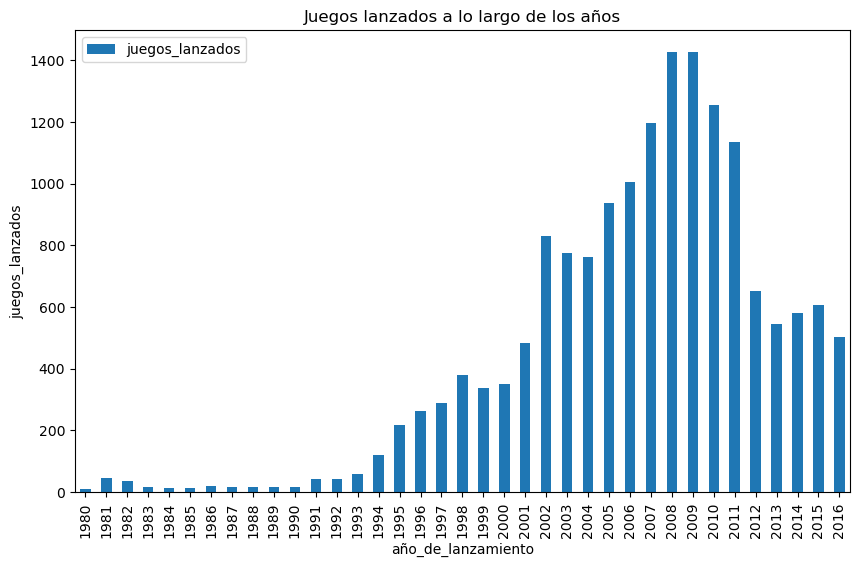

In [24]:
data_fitered.plot(kind='bar',
                  x='year_of_release',
                  y='juegos_lanzados',
                  xlabel='año_de_lanzamiento',
                  ylabel='juegos_lanzados',
                  title='Juegos lanzados a lo largo de los años',
                  figsize=(10,6),
)
plt.show()

Observamos que si no es que hasta los años 95 que comienza un crecimiento en esta industria y unas ventas significativas hasta llegar un pico en los años 2007 y 2008. 

### ¿Como ha variado las ventas de las distintas plataformas a lo largo de los años? 

Para esta seccion veremos el comportamiento de ventas de juegos de las distintas plataforma a lo largo de los años, como es que algunas consolas a pesar de tener altas ventas desaparecen con el tiempo, como es la ventas de las consolas mas actuales, etc. 

In [25]:
data_pivot= data_game.pivot_table(index=['platform','year_of_release'],values=['total_sales'], aggfunc=['sum']).reset_index()
print(data_pivot)

    platform year_of_release         sum
                             total_sales
0       2600            1980       11.38
1       2600            1981       35.68
2       2600            1982       28.88
3       2600            1983        5.84
4       2600            1984        0.27
..       ...             ...         ...
233       XB            2008        0.18
234     XOne            2013       18.96
235     XOne            2014       54.07
236     XOne            2015       60.14
237     XOne            2016       26.15

[238 rows x 3 columns]


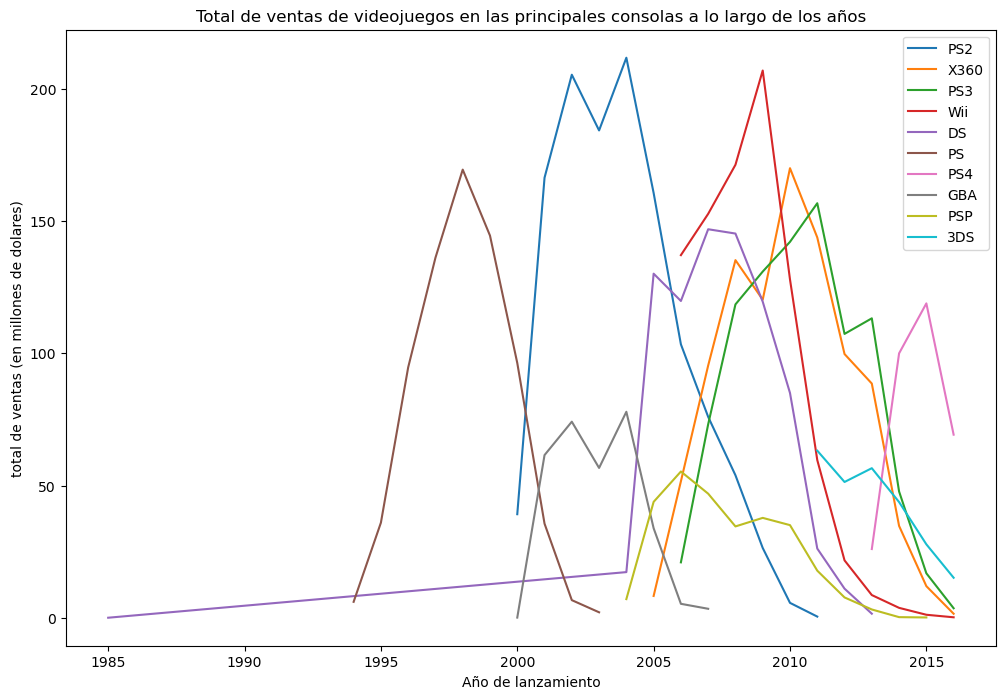

In [26]:
# Ajustar los nombres de las columnas para facilitar el acceso
data_pivot.columns = ['platform', 'year_of_release', 'total_sales']
# las 10 mejores
top_ten=data_pivot.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

#Graficamos 
plt.figure(figsize=(12, 8)) 
# creamos los ejes
ax = plt.gca()
for platform in top_ten.index:
    data_plot = data_pivot[data_pivot['platform'] == platform]
    # mantenemos los ejes para cada grafica 
    data_plot.plot(x='year_of_release', y='total_sales', kind='line', ax=ax, label=platform)

plt.title('Total de ventas de videojuegos en las principales consolas a lo largo de los años')
plt.xlabel('Año de lanzamiento')
plt.ylabel('total de ventas (en millones de dolares)')
plt.legend()
plt.show()

Como vemos, en la gran mayoría de consolas, estas tienen casi el mismo comportamiento: llegan a un pico de ventas y luego caen, lo cual es obvio debido al paso del tiempo y la llegada de nuevas consolas. Sin embargo, podemos hablar de algunos detalles interesantes:

1. La consola que más millones de dólares ha generado es la 'PS2'. Esto probablemente era de esperar después del enorme éxito que tuvo la 'PS' (PlayStation), ya que cuenta con uno de los picos más altos a pesar de ser de los años 90. Las consolas que lideran las ventas en la gran mayoría son las más actuales.

2. En los primeros lugares ocupados por 'PS2' y 'Wii', vemos que ambos han sido líderes en ventas de videojuegos en diferentes períodos de tiempo. Observamos cómo la caída de ventas de videojuegos para 'PS2' puede deberse a la aparición de la consola 'Wii', ya que esta tuvo un aumento en ventas, a diferencia de la 'PS2', que estaba en caída durante el mismo período de tiempo.

3. ¡Interesante! Indagando un poco, podemos notar que las consolas portátiles son las que cuentan con los picos más bajos en ventas de videojuegos, siendo el más alto el de la consola portátil 'DS', que hace referencia a la Nintendo DS, una de las consolas portátiles más queridas. Por debajo tenemos a la 'PSP' de Sony y a la 'GBA' (Game Boy Advance).

###  ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?


En nuestro dataframe 'data_pivot' tenemos el nombre de cada plataforma y la cantidad de millones de dolares que hizo cada año con los juegos hechos para esta plataforma. Como bien sabemos estas presentan ciertos periodos de tiempo en donde alcanzan un maximo o un pico de ventas y luego viene una caida, esto por el paso del tiempo y la aparicion de nuevas consolas. Analizaremos que tanto demora una consola en 'desaparecer' es decir cuando deja de generar ventas de videojuegos para estas consolas. 

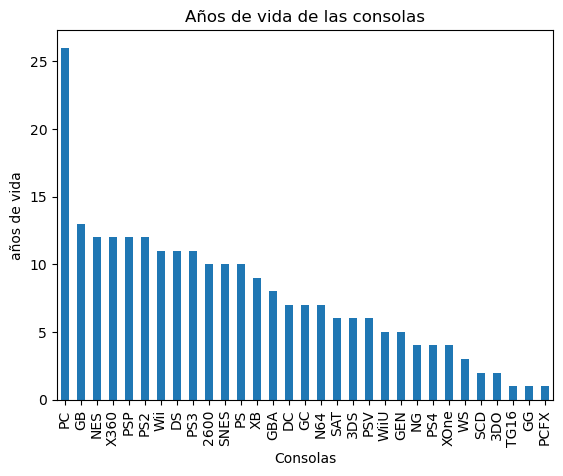

In [27]:
#contaremos cuantas veces se repite la 'platform' para asi saber cuantos años tardo en desaparecer
lifetime_of_a_console=data_pivot['platform'].value_counts()
#Graficaremos 
lifetime_of_a_console.plot(kind='bar')
plt.xlabel('Consolas')
plt.ylabel('años de vida')
plt.title('Años de vida de las consolas')
plt.show()

Podemos ver que consolas han perdurado durante mas tiempo, lo ideal seria ver que tanto duraban las consolas de antes con las actuales respecto a la ventas de videojuegos, asi que iremos a por ello. 

In [28]:
# Reseteamos el index para manejarlo mejor 
lifetime_of_a_console=lifetime_of_a_console.reset_index()
# Columnas mas descriptivas 
lifetime_of_a_console.columns=['platform','años_de_vida']
#Agrupamos por plataforma y nos quedamos 'year_of_release' minimo considerando como año de aparicion de la consola
df_orden=data_pivot.groupby('platform')['year_of_release'].min().sort_values().reset_index()
#Combinamos amobs data frame por 'platform' 
df_merge=df_orden.merge(lifetime_of_a_console,how='left',on='platform')
print(df_merge.head(8))

  platform  year_of_release  años_de_vida
0     2600             1980            10
1      NES             1983            12
2       DS             1985            11
3       PC             1985            26
4       GB             1988            13
5     SNES             1990            10
6      GEN             1990             5
7       GG             1992             1


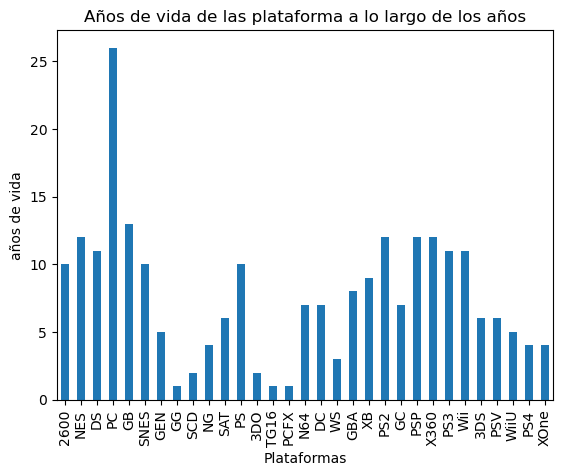

In [29]:
df_merge.plot(x='platform',y='años_de_vida',kind='bar',legend=False)
plt.xlabel('Plataformas')
plt.ylabel('años de vida')
plt.title('Años de vida de las plataforma a lo largo de los años')
plt.show()

In [30]:
print('media de años de vida: ',df_merge['años_de_vida'].mean())
print('mediana: ', df_merge['años_de_vida'].median())

media de años de vida:  7.67741935483871
mediana:  7.0


Como vemos las consolas han sido ordenadas conforme han ido apareciendo desde las más antiguas hasta las mas actuales como 'PS4' o 'XOne'. La gran mayoria de consolas tiene un tiempo estimado de vida de 7 años. A excepcion de las 'PC' que como sabemos no son consolas como tal y problamente nunca desaparezcan ya que no solo tienen uso de entretenimiento como lo son los videojuegos. Vemos un decaimiento el tiempo de vida para las ultimas consolas, lo que nos pueda decir algo de la constante salida de nuevas consolas y por tanto menos tiempo de vida a comparacion de las consolas mas antiguas.   

### ¿ Que pasará en 2017 ? 

Como vemos las ultimas consolas sus ventas en videojuegos para estas han ido de bajada, en el caso 'PS4' es mas que seguro que las ventas bajen, esto porque la consola salio en 2013 y considerando el tiempo promedio de años de vida no le quedan mucho tiempo asi que la caida de ventas para esta consola se dará. Tambien tomando en consideracion las apariciones de las consolas, es probable que en el siguiente periodo de tiempo aparezca una nueva consola y pueda liderar en ventas ya que la gran mayoria de consolas anteriores han ido en picada por lo que podriamos decir que seria buena idea sacar una nueva consola al mercado. 

### Trabajaremos con datos relevantes 

Vamos a trabajar con datos mas actuales, para esto recolectaremos datos desde el año 2007. Esto por varias razones, desde las salidas de nuevas consolas, asi como aquellas que estan en caida que nos permitiran mejor tomar decisiones para el año 2017 ya que solo contamos con datos hasta el año 2016. 

In [31]:
data_game=data_game[data_game['year_of_release']>=2007]

### Diagrama de cajas 

Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos. 

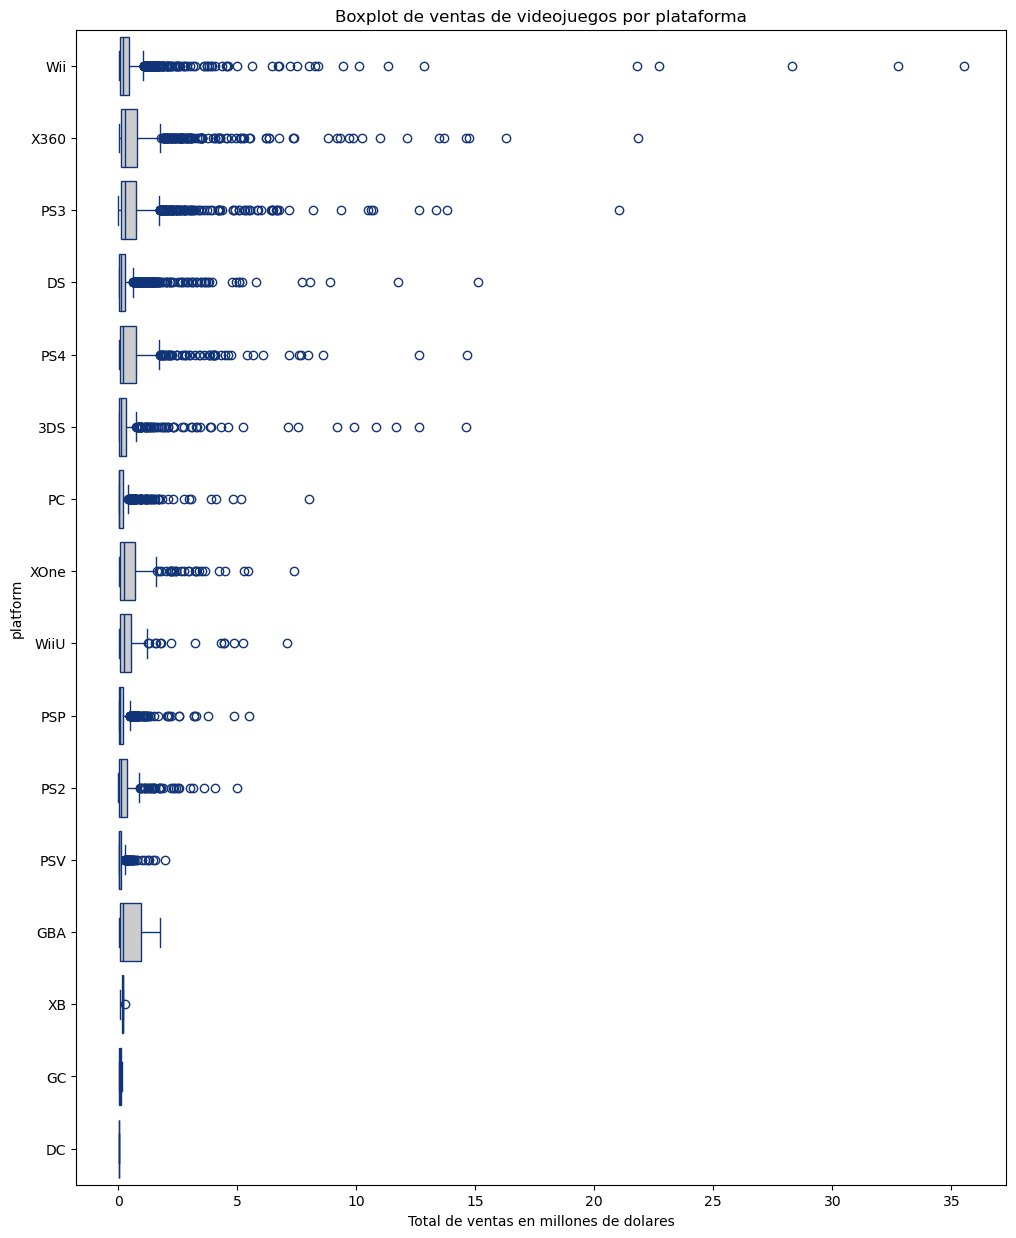

In [32]:
# Construimos el diagrama de cajas 
plt.figure(figsize=(12, 15))
sns.boxplot(data=data_game,x='total_sales', y='platform',color=".8", linecolor="#137")
plt.title('Boxplot de ventas de videojuegos por plataforma')
plt.xlabel('Total de ventas en millones de dolares')
plt.show() 

Como podemos ver existen valores atipicos para determinadas consolas. Sobretodo para las consolas con mas ventas, esto nos da una idea que ciertos videojuegos han obtenido demasiadas ventas como el caso de 'WII' que presenta un punto bastante alejado, lo que quiere decir que hay un juego que ha generado cerca de 35 millones de dolares. Esto logicamente han vuelto populares a estas consolas, lo que nos puede decir que un solo juego puede hacer que cierta plataforma sea una de las que más dolares han generado en venta de videojuegos. 

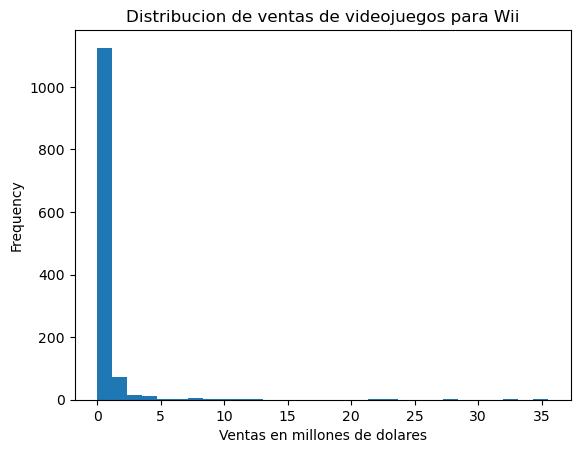

In [33]:
#Veamos las distribucion de la consola 'Wii' 
data_game[data_game['platform']=='Wii']['total_sales'].plot(kind='hist',bins=30)
plt.title('Distribucion de ventas de videojuegos para Wii')
plt.xlabel('Ventas en millones de dolares')
plt.show()

In [34]:
# Veamos las ventas totales de cada plataforma 
data_sum=data_game.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(data_sum)

platform
PS3     910.38
X360    901.37
Wii     754.03
DS      535.54
PS4     314.14
3DS     257.81
PSP     183.31
PS2     162.38
PC      160.57
XOne    159.32
WiiU     82.19
PSV      53.81
GBA       3.40
XB        0.73
GC        0.27
DC        0.06
Name: total_sales, dtype: float64


¡PS3! Viene recaudando mas en ventas. Es claro que las 3 plataformas lideres en ventan llevan mucha ventaja en ventas en comparacion a otras, tomar en consideracion que 'PS4 siendo una de las consolas mas actuales no logra pasar a su antecesor si bien es cierto a esta consola le quedan 3 años más aproximadamente, como se dijo antes su ventas vienen decayendo. 

In [35]:
# promedio de ventas 
data_mean=data_game.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print(data_mean)

platform
X360    0.804077
PS4     0.801378
PS3     0.711790
XOne    0.645020
Wii     0.607110
GBA     0.566667
WiiU    0.559116
3DS     0.503535
DS      0.301204
PS2     0.297399
PC      0.221782
PSP     0.205045
XB      0.182500
PSV     0.125431
GC      0.067500
DC      0.030000
Name: total_sales, dtype: float64


En promedio las ventas de videojuegos de X360 y PS4 son más altas. Si bien la recaudacion de la venta de videojuegos de PS4 no supera a la más altas, en promedio sigue siendo una de las más altas esto nos puede decir que los videojuegos para 'PS4' han generado valores altos de recaudacion o quizás han tenido elevados costos en estos videojuegos, ya que no tiene tanto años en el mercado como las demas plataformas.

### Correlacion entre la ventas y la critica 

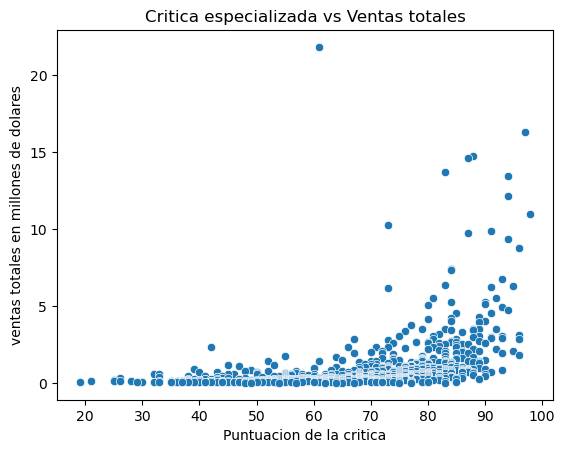

coeficiente de correlacion:  0.3969104361038359


In [36]:
#Seleccionamos solo la consola X360 
dt_platform_x360=data_game[data_game['platform']=='X360']
#Crear un gráfico de dispersión con seaborn
sns.scatterplot(data=dt_platform_x360, x='critic_score', y='total_sales')
plt.title('Critica especializada vs Ventas totales')
plt.xlabel('Puntuacion de la critica')
plt.ylabel('ventas totales en millones de dolares')
# Mostrar el gráfico
plt.show()
print('coeficiente de correlacion: ', dt_platform_x360['critic_score'].corr(dt_platform_x360['total_sales']))

No existe correlacion entre la critica y las ventas. Si bien es cierto algunos juegos con alta puntuacion de parte de la critica han llevado a generar altas ganancias, no es suficiente para afirmar esta correlacion.  

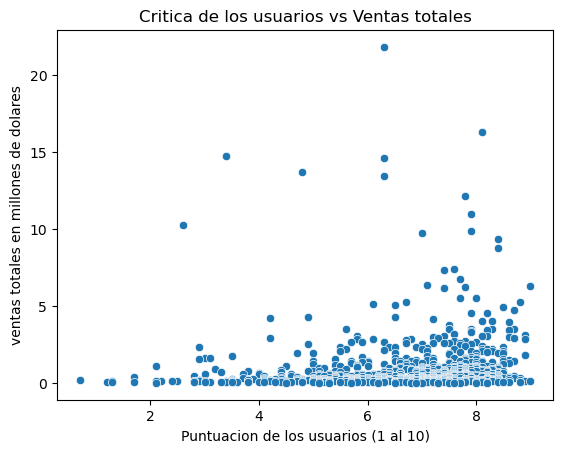

coeficiente de correlacion:  0.11462655751844543


In [37]:
# Veamos la correlacion con la critica de los usuarios 
sns.scatterplot(data=dt_platform_x360,x='user_score',y='total_sales')
plt.title('Critica de los usuarios vs Ventas totales')
plt.xlabel('Puntuacion de los usuarios (1 al 10)')
plt.ylabel('ventas totales en millones de dolares')
plt.show()
print('coeficiente de correlacion: ', dt_platform_x360['user_score'].corr(dt_platform_x360['total_sales']))

En este caso tambien notamos un coeficiente de relacion bajisimo por lo que no podemos afirmar una correlacion entre la critica de los usuarios y la cantidad de dolares generado para cada juego. 

### Mismos juegos en otras plataformas 

Para esta seccion veremos como son las ventas de los mismos juegos pero en otra consola como en la seccion anterior vimos a la 'X360', ahora veremos las ventas de estos juegos en la 'PS3'. 

In [38]:
#Juegos en comun en ambas plataformas 
df_juegos= dt_platform_x360.merge(data_game[data_game['platform']=='PS2'],on='name')
#Seleccionamos las columnas que nos interesan 
df_juegos=df_juegos.loc[:,['name','total_sales_x','total_sales_y']]
df_juegos.columns=['name','ventas_x360','ventas_PS2']
# Seleccionamos algunos juegos para la comparacion 
df_juegos_sample=df_juegos.sample(35,random_state=42)
print(df_juegos_sample.head(5))

                                         name  ventas_x360  ventas_PS2
81                            Trivial Pursuit         0.37        0.27
142                 Backyard NFL Football '10         0.11        0.06
31             PES 2009: Pro Evolution Soccer         1.01        2.51
29                 WWE SmackDown vs. Raw 2010         1.04        1.08
118  The Chronicles of Narnia: Prince Caspian         0.18        0.40


In [39]:
# reorganizamos el data frame
df_momentanea=df_juegos_sample.melt(id_vars=['name'],var_name='Platform',value_name='Venta')

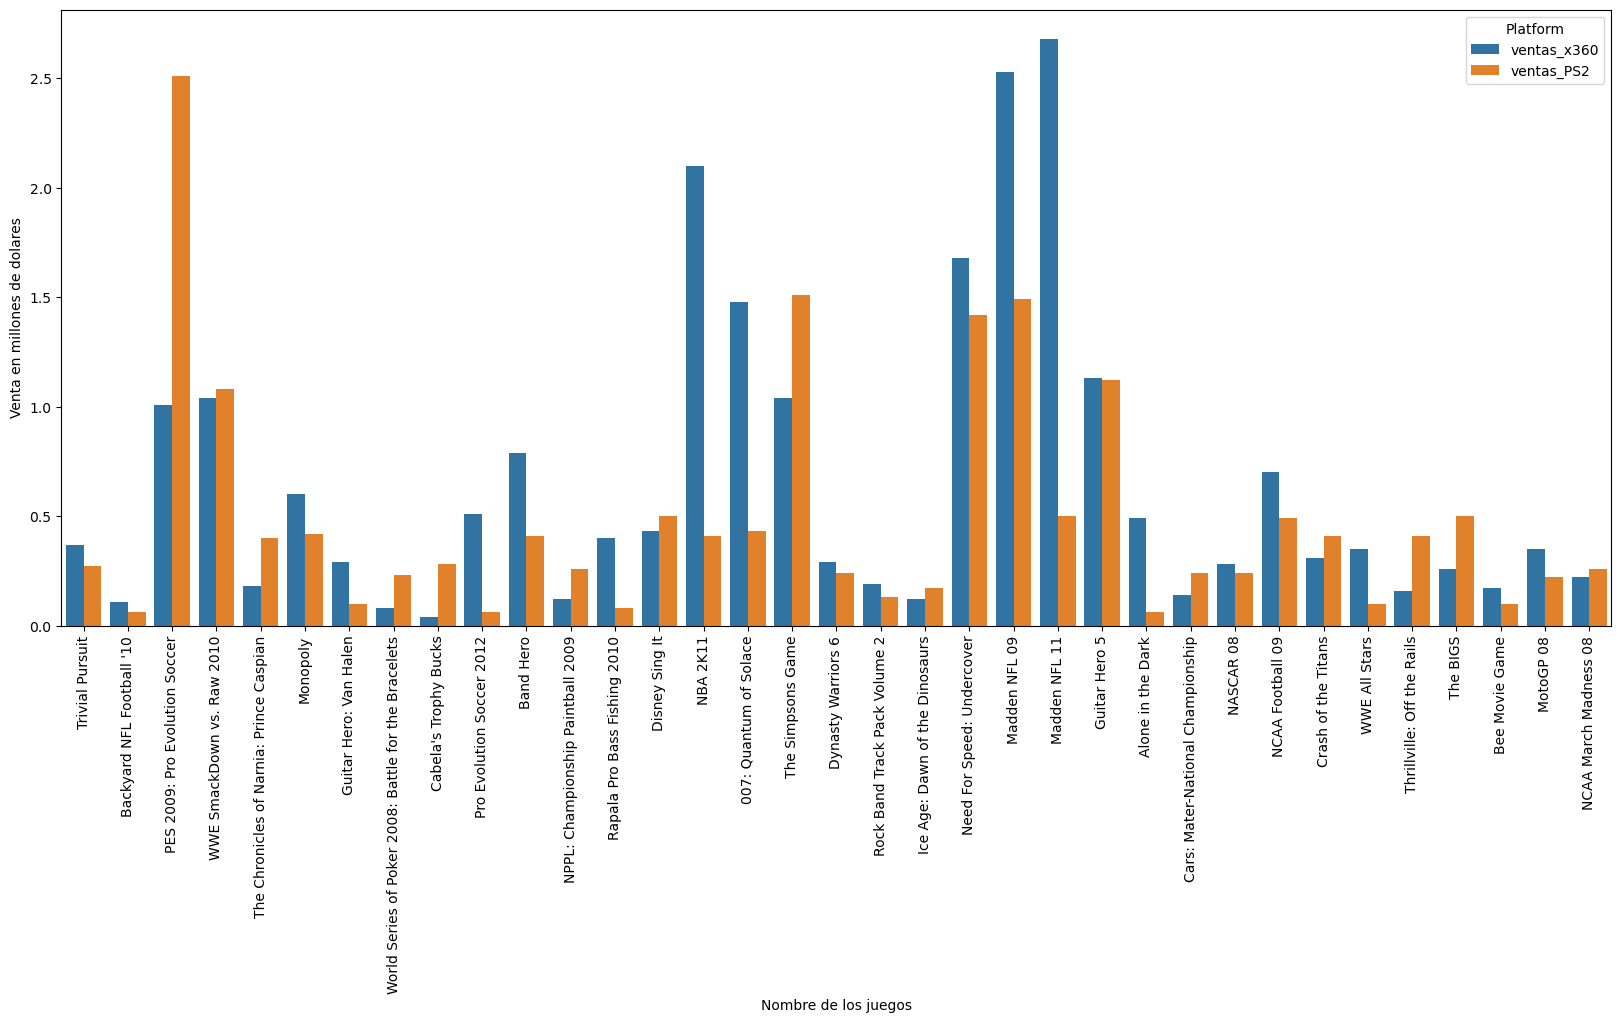

In [40]:
plt.figure(figsize=(20, 8))
sns.barplot(x='name',y='Venta',hue='Platform',data=df_momentanea)
plt.xlabel('Nombre de los juegos')
plt.ylabel('Venta en millones de dolares')
plt.xticks(rotation=90)
plt.show()

Vemos que estan casi a la par en algunos casos las ventas en la X360 en algunos juegos supera y por mucho a la venta del mismo juego en la PS2 y lo contrario tambien pasa. 

In [41]:
# Veamos las veces que las consolas superaron en ventas a la otra.
filas_comunes=len(df_juegos)
contador = (df_juegos['ventas_PS2'] > df_juegos['ventas_x360']).sum()
print(f'De un total de {filas_comunes} juegos comunes en ambas consolas, PS2 supero en ventas {contador} veces')
# recaudacion total 
ventas_totales_x360=(df_juegos['ventas_x360'].sum())
ventas_totales_PS2=(df_juegos['ventas_PS2'].sum())
print('Ventas totales de videoojuegos para X360: ',ventas_totales_x360)
print('Ventas totales de videoojuegos para PS2: ',ventas_totales_PS2)
# media 
promedio_x360 = df_juegos['ventas_x360'].mean()
promedio_ps2 = df_juegos['ventas_PS2'].mean()

print(f"Ventas totales promedio Xbox 360: {promedio_x360}")
print(f"Venta totales promedio PS2: {promedio_ps2}")

De un total de 155 juegos comunes en ambas consolas, PS2 supero en ventas 75 veces
Ventas totales de videoojuegos para X360:  114.08
Ventas totales de videoojuegos para PS2:  88.83000000000001
Ventas totales promedio Xbox 360: 0.7360000000000001
Venta totales promedio PS2: 0.5730967741935481


Como vemos, en muchos videojuegos, las ventas para la PS2 superaron a las de la X360. Sin embargo, en recaudación total, la X360 terminó generando más dinero. Podemos darnos cuenta de esto al observar las recaudaciones totales y las ventas promedio, ya que para el caso de la PS2, el valor promedio es menor que para la X360. Esto puede deberse a que la X360 es una consola que salió 5 años después que la PS2, lo que hace que los videojuegos para esta consola puedan ser más caros, y por eso se obtiene una mayor recaudación en esta consola, a pesar de tratarse de los mismos juegos en una plataforma diferente. 

### distribucion general de ventas por generos 

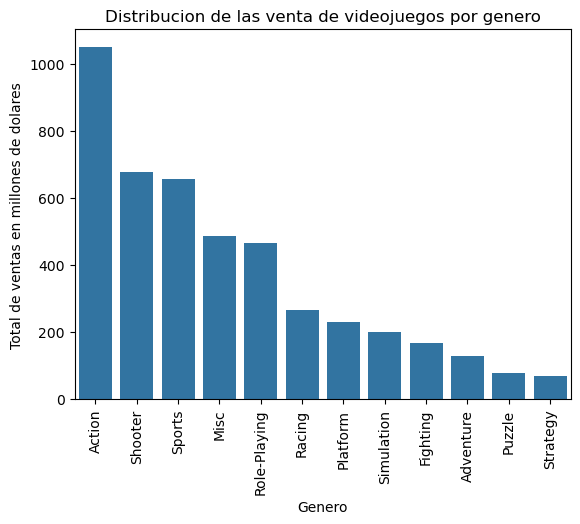

In [42]:
data_genre=data_game.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
sns.barplot(data_genre)
plt.xlabel('Genero')
plt.ylabel('Total de ventas en millones de dolares')
plt.title('Distribucion de las venta de videojuegos por genero')
plt.xticks(rotation=90)
plt.show()

Quien lidera en las ventas es el genero de Accion, en segundo lugar tenemos a genero de disparos y deportes. Podriamos optar por lanzar al mercado alguno de los 3 generos con más ventas.

### Creamos un perfil de usuario para cada región

In [43]:
def perfil_usuario(column): 
    top_5_platform=data_game.groupby('platform')[column].sum().sort_values(ascending=False).head(5)
    top_5_genres=data_game.groupby('genre')[column].sum().sort_values(ascending=False).head(5)
    return top_5_platform,top_5_genres

# perfil para NA 
top_5_platform_NA , top_5_genres_NA= perfil_usuario('na_sales')
#perfil para EU
top_5_platform_UE, top_5_genres_UE= perfil_usuario('eu_sales')
# perfil para JP
top_5_platform_JP , top_5_genres_JP =perfil_usuario('jp_sales')

#### (NA) North America

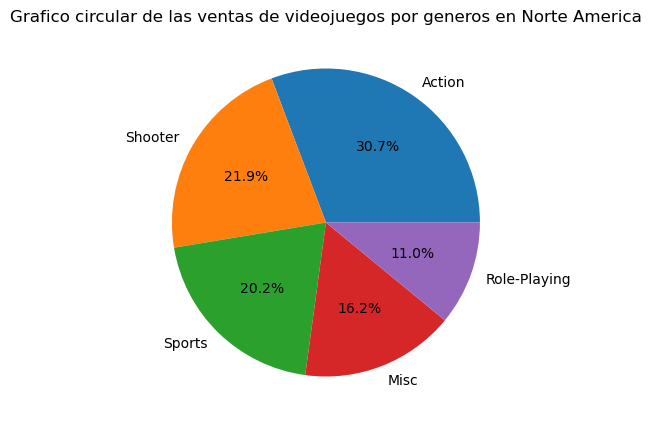

In [44]:
plt.figure(figsize=(5,5))
plt.pie(top_5_genres_NA,labels=top_5_genres_NA.index,autopct='%1.1f%%')
plt.title('Grafico circular de las ventas de videojuegos por generos en Norte America')
plt.show()

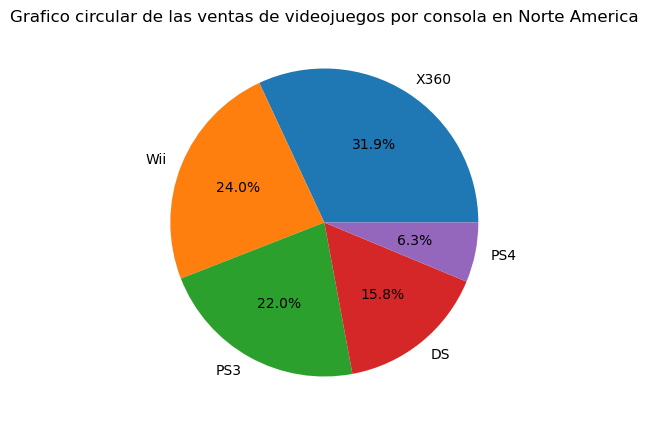

In [45]:
plt.figure(figsize=(5,5))
plt.pie(top_5_platform_NA,labels=top_5_platform_NA.index,autopct='%1.1f%%')
plt.title('Grafico circular de las ventas de videojuegos por consola en Norte America')
plt.show()

#### (UE) Europa 

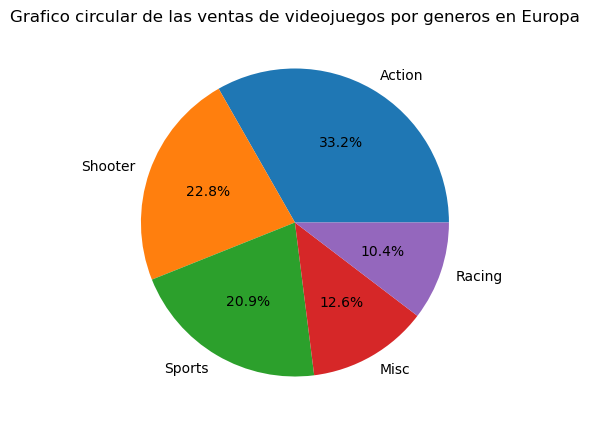

In [46]:
plt.figure(figsize=(5,5))
plt.pie(top_5_genres_UE,labels=top_5_genres_UE.index,autopct='%1.1f%%')
plt.title('Grafico circular de las ventas de videojuegos por generos en Europa')
plt.show()

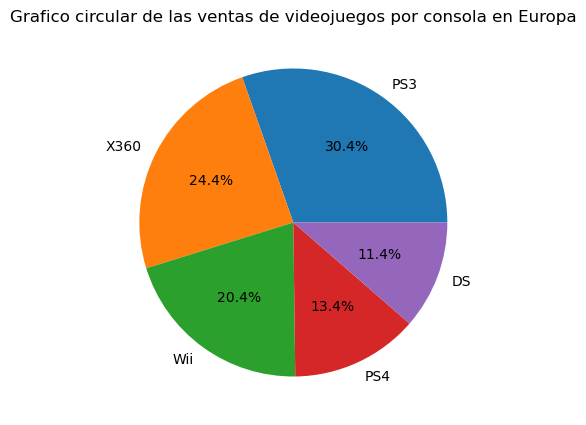

In [47]:
plt.figure(figsize=(5,5))
plt.pie(top_5_platform_UE,labels=top_5_platform_UE.index,autopct='%1.1f%%')
plt.title('Grafico circular de las ventas de videojuegos por consola en Europa')
plt.show()

#### (JP) Japon 

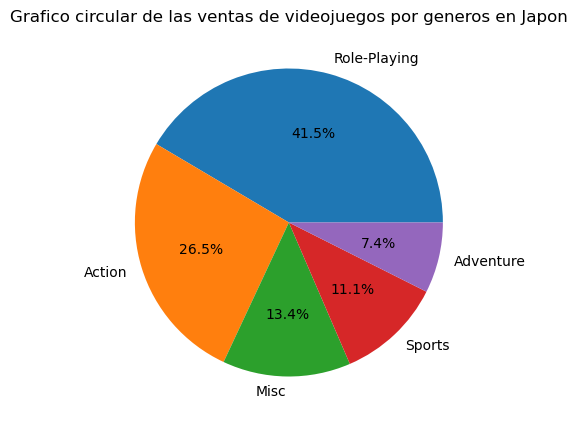

In [48]:
plt.figure(figsize=(5,5))
plt.pie(top_5_genres_JP,labels=top_5_genres_JP.index,autopct='%1.1f%%')
plt.title('Grafico circular de las ventas de videojuegos por generos en Japon')
plt.show()

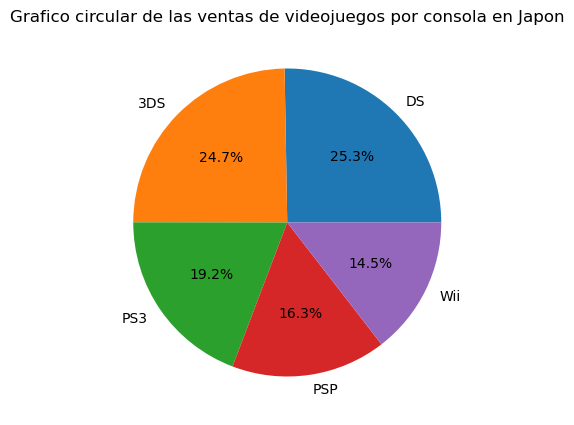

In [49]:
plt.figure(figsize=(5,5))
plt.pie(top_5_platform_JP,labels=top_5_platform_JP.index,autopct='%1.1f%%')
plt.title('Grafico circular de las ventas de videojuegos por consola en Japon')
plt.show()

### Conclusiones sobre las ventas para cada region 

Como vemos, estos gráficos nos permiten visualizar las diferencias entre los mercados de Norteamérica, Europa y Japón. Por lo tanto, podemos llegar a las siguientes conclusiones:

1. Tanto en Europa como en Norteamérica, predomina el género de acción, y en segundo lugar, el género 'shooter' (disparos). Los porcentajes en ventas son casi similares en ambas regiones. En Japón, por el contrario, notamos géneros populares distintos. En primer lugar están los juegos 'Role-Playing' o juegos de rol, donde el jugador controla las acciones de un personaje. Las diferencias en las preferencias de géneros de videojuegos entre Japón, Norteamérica y Europa se deben a una combinación de factores culturales, históricos, influencias de desarrolladores y la evolución del mercado.

2. Como vemos, el género 'shooter' no aparece en el mercado japonés, pero ocupa el segundo lugar en los mercados norteamericano y europeo. Esto puede deberse a que el mercado japonés quizás prefiere experiencias inmersivas, con historias profundas y personajes complejos, lo que explica la preferencia por videojuegos de géneros 'Role-Playing'. Por el contrario, el mercado norteamericano y europeo prefieren más la acción y experiencias más dinámicas.

3. Quien lidera en ventas en el mercado norteamericano es la X360; sin embargo, esta ocupa el segundo lugar en el mercado europeo, ya que Sony con la PS3 se lleva el primer lugar. Esto se puede deber a que la consola X360 es desarrollada por Microsoft, una empresa norteamericana, y por tanto genera cierta influencia en el mercado norteamericano.

4. El mercado japonés es totalmente distinto. Hablemos de las consolas que lideran: en primer lugar tenemos la 'DS' o Nintendo DS, después le sigue otra consola de Nintendo y, finalmente, la PS3 de Sony. Esto se puede deber a varios factores. La X360 no tiene presencia en el mercado japonés, ya que históricamente ha competido con empresas como Sony y Nintendo, cuyo origen es japonés. Esto hace que este mercado sea completamente difícil para Microsoft. Las preferencias locales son notorias, además de la enorme presencia de ambas empresas en este país.

### Prueba de hipotesis 

Hipótesis: Calificaciones promedio de usuarios para Xbox One y PC son las mismas

In [50]:
from scipy.stats import ttest_ind

# Seleccionar datos
xbox_one_scores = data_game[data_game['platform'] == 'XOne']['user_score'].dropna()
pc_scores = data_game[data_game['platform'] == 'PC']['user_score'].dropna()

# Prueba t
alpha = 0.05
results = ttest_ind(xbox_one_scores, pc_scores)

print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('No rechazamos la hipotesis nula')

p-value: 0.05554752084307562
No rechazamos la hipotesis nula


Hipótesis: Calificaciones promedio de usuarios para géneros Acción y Deportes son las mismas.

In [51]:
# Seleccionar datos
action_scores = data_game[data_game['genre'] == 'Action']['user_score'].dropna()
sports_scores = data_game[data_game['genre'] == 'Sports']['user_score'].dropna()

# Prueba t
results = ttest_ind(action_scores, sports_scores)

print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('No rechazamos la hipotesis nula')

p-value: 1.0894514919563485e-12
Rechazamos la hipotesis nula


Las hipótesis formuladas sobre las calificaciones de usuarios entre plataformas y géneros fueron probadas y los resultados indican que las calificaciones promedio pueden diferir significativamente en algunos casos

### Conclusiones generales

Se ha hablado de las distintas visualizaciones mostradas a lo largo del proyecto, que nos brindan las tendencias del mercado hacia ciertos géneros, plataformas, etc. Podemos comentar los siguientes puntos:

1. Las plataformas o consolas que más ventas han generado son distintas para cada región. Esto refleja ciertas influencias culturales, la influencia de los desarrolladores y la fuerte presencia de ciertas empresas en determinadas regiones, como lo es Sony y Nintendo en Japón o Microsoft en Norteamérica.

2. Las preferencias varían totalmente dependiendo de la región. Como se mencionó anteriormente, las preferencias hacia ciertos géneros, como acción y shooter en regiones como Europa y Norteamérica, no son necesariamente las preferidas en otras regiones.

3. Puede que los mismos juegos en distintas plataformas recauden más dinero debido a temas de tecnología o a que las consolas más actuales tengan costos de juego más altos, como se muestra en la comparación entre la 'X360' y la 'PS2'.

4. Las ventas de videojuegos en las distintas consolas presentan casi el mismo comportamiento: llegan a un punto máximo de ventas, luego bajan, y tienen un tiempo de vida promedio de 7 años, hasta que una nueva consola reemplaza a la anterior en el mercado.

